In [1]:
import warnings

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import ast

In [5]:
import re

In [6]:
import nltk

In [7]:
import string

In [8]:
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:
warnings.filterwarnings('ignore')

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nandita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nandita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nandita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nandita\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
from scipy.sparse import hstack,csr_matrix,issparse

In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
df = pd.read_csv("TA_restaurants_curated.csv")

In [16]:
df.head()

Unnamed: 0                        Name       City  \
0           0  Martine of Martine's Table  Amsterdam   
1           1         De Silveren Spiegel  Amsterdam   
2           2                     La Rive  Amsterdam   
3           3                    Vinkeles  Amsterdam   
4           4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3  ['French', 'European', 'International', 'Conte...      4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   

  Price Range  Number of Reviews  \
0    $$ - $$$              136.0   
1        $$$$              812.0   
2        $$$$              567.0   
3        $$$$              564.0   
4        $$$$              316.0   

                                             Reviews  \
0  [['Just like home', 'A Warm Welcome to Wintry ...   
1  [['Great food and staff', 'just perfect'], ['0...   
2  [['Satisfaction', 'Delicious old school restau...   
3  [['True five star dinner', 'A superb evening o...   
4  [['Best meal.... EVER', 'super food experience...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g188590-d11752080-Reviews-M...  d11752080  
1  /Restaurant_Review-g188590-d693419-Reviews-De_...    d693419  
2  /Restaurant_Review-g188590-d696959-Reviews-La_...    d696959  
3  /Restaurant_Review-g188590-d1239229-Reviews-Vi...   d1239229  
4  /Restaurant_Review-g188590-d6864170-Reviews-Li...   d6864170

In [17]:
df.shape

(125527, 11)

In [18]:
df.columns

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [19]:
df['City'].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava',
       'Brussels', 'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh',
       'Geneva', 'Hamburg', 'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana',
       'London', 'Luxembourg', 'Lyon', 'Madrid', 'Milan', 'Munich',
       'Oporto', 'Oslo', 'Paris', 'Prague', 'Rome', 'Stockholm', 'Vienna',
       'Warsaw', 'Zurich'], dtype=object)

In [20]:
df['City'].nunique()

31

In [21]:
df['City'].value_counts()

City
London        18212
Paris         14874
Madrid         9543
Barcelona      8425
Berlin         7078
Milan          6687
Rome           5949
Prague         4859
Lisbon         3986
Vienna         3724
Amsterdam      3434
Brussels       3204
Hamburg        3131
Munich         2995
Lyon           2930
Stockholm      2705
Budapest       2606
Warsaw         2352
Copenhagen     2109
Dublin         2082
Athens         1938
Edinburgh      1865
Zurich         1667
Oporto         1580
Geneva         1572
Krakow         1354
Helsinki       1228
Oslo           1213
Bratislava     1067
Luxembourg      657
Ljubljana       501
Name: count, dtype: int64

In [22]:
df.isnull().sum()/len(df)*100

Unnamed: 0            0.000000
Name                  0.000000
City                  0.000000
Cuisine Style        24.975503
Ranking               7.688386
Rating                7.671656
Price Range          38.123272
Number of Reviews    13.816948
Reviews               7.660503
URL_TA                0.000000
ID_TA                 0.000000
dtype: float64

In [23]:
df = df[['Name','City','Cuisine Style','Ranking','Rating','Price Range','Number of Reviews','Reviews']]

In [24]:
df.head()

Name       City  \
0  Martine of Martine's Table  Amsterdam   
1         De Silveren Spiegel  Amsterdam   
2                     La Rive  Amsterdam   
3                    Vinkeles  Amsterdam   
4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3  ['French', 'European', 'International', 'Conte...      4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   

  Price Range  Number of Reviews  \
0    $$ - $$$              136.0   
1        $$$$              812.0   
2        $$$$              567.0   
3        $$$$              564.0   
4        $$$$              316.0   

                                             Reviews  
0  [['Just like home', 'A Warm Welcome to Wintry ...  
1  [['Great food and staff', 'just perfect'], ['0...  
2  [['Satisfaction', 'Delicious old school restau...  
3  [['True five star dinner', 'A superb evening o...  
4  [['Best meal.... EVER', 'super food experience...

In [25]:
df[df['Cuisine Style'].isna()].head(20)

Name       City Cuisine Style  Ranking  Rating  \
175           Barney's Coffeeshop  Amsterdam           NaN    176.0     4.5   
282                Excalibur Cafe  Amsterdam           NaN    283.0     4.5   
708           Cafe De Kroegtijger  Amsterdam           NaN    709.0     5.0   
831              In de Olofspoort  Amsterdam           NaN    833.0     4.5   
849                    Vesper Bar  Amsterdam           NaN    851.0     4.5   
1121                   Prinz Wolf  Amsterdam           NaN   1124.0     5.0   
1141                   Anne & Max  Amsterdam           NaN   1144.0     4.5   
1213         Little Delirium Cafe  Amsterdam           NaN   1216.0     4.5   
1218                    Quies Tea  Amsterdam           NaN   1221.0     5.0   
1331         Clubhouse Old Course  Amsterdam           NaN   1334.0     4.5   
1342             Artisani Burgers  Amsterdam           NaN   1345.0     4.5   
1369                         Nest  Amsterdam           NaN   1372.0     4.5   
1375  Stefs Bakery, Pastry & More  Amsterdam           NaN   1378.0     5.0   
1378          The Flying Dutchman  Amsterdam           NaN   1381.0     4.5   
1394                   Sky Lounge  Amsterdam           NaN   1397.0     4.0   
1402                         Baut  Amsterdam           NaN   1405.0     4.0   
1438        Vincent Kaas en Vlees  Amsterdam           NaN   1441.0     4.5   
1445               Bagels & Wraps  Amsterdam           NaN   1448.0     4.5   
1451                 Goulash@Home  Amsterdam           NaN   1454.0     5.0   
1457                   Burger Bar  Amsterdam           NaN   1460.0     4.5   

     Price Range  Number of Reviews  \
175          NaN              498.0   
282          NaN              204.0   
708          NaN               23.0   
831          NaN               63.0   
849          NaN              110.0   
1121         NaN               12.0   
1141         NaN               25.0   
1213         NaN               24.0   
1218         NaN               13.0   
1331         NaN               21.0   
1342         NaN               22.0   
1369         NaN               15.0   
1375         NaN               12.0   
1378         NaN               12.0   
1394         NaN               24.0   
1402         NaN               33.0   
1438         NaN               16.0   
1445         NaN               29.0   
1451         NaN                8.0   
1457         NaN               42.0   

                                                Reviews  
175   [['So good we went back 3 times', 'Polite staf...  
282   [['Great bar', 'Old school metal music'], ['12...  
708   [['Short break', 'Excellent place'], ['01/06/2...  
831   [['Wonderful Experience !!', 'Absolutely the b...  
849   [['Great spot', 'What a cocktail'], ['11/14/20...  
1121  [['Delicious!', 'Last night in Amsterdam'], ['...  
1141  [['Healthy Food with Good Design', 'New and tr...  
1213  [['Great for a last round of beer', 'Best beer...  
1218  [['Hotspot with delicious teas an amazing hea....  
1331                        [['Oasis'], ['10/18/2016']]  
1342  [['Brill Burgers', 'Great halaal burgers'], ['...  
1369  [['Rooftop experience at Casa Amsterdam', 'A n...  
1375  [['A lunch after Rijksmuseum', 'Amazing and re...  
1378  [['Dennis runs a good bar', 'Perfect place to ...  
1394  [['Beautiful Bar and views', 'Afternoon Drinks...  
1402  [['Good food in cool, open space off the usua....  
1438  [['The best ever in Amsterdam!', 'LUNCH!!!'], ...  
1445  [['Perfect lunchtime snack', 'Yummy'], ['11/14...  
1451  [['Best place in Amsterdam!', 'Real Goulash <3...  
1457  [['Fresh!', 'Very good burger, friendly staff....

In [26]:
combo_counts = df['Cuisine Style'].value_counts()

In [27]:
df['Cuisine Style'].nunique()

20971

In [28]:
print(combo_counts[:5])

Cuisine Style
['Italian']    3473
['French']     2569
['Spanish']    2130
['Cafe']       1492
['Pizza']      1198
Name: count, dtype: int64


In [29]:
df['Ranking'].unique()

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.6365e+04, 1.6438e+04,
       1.0556e+04], shape=(16443,))

In [30]:
df.columns

Index(['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range',
       'Number of Reviews', 'Reviews'],
      dtype='object')

In [31]:
df['Ranking_bin'] = pd.cut(
    df['Ranking'],
    bins=[0, 100, 500, 1000, 5000, 10000, 20000],
    labels=['Top 100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+']
)

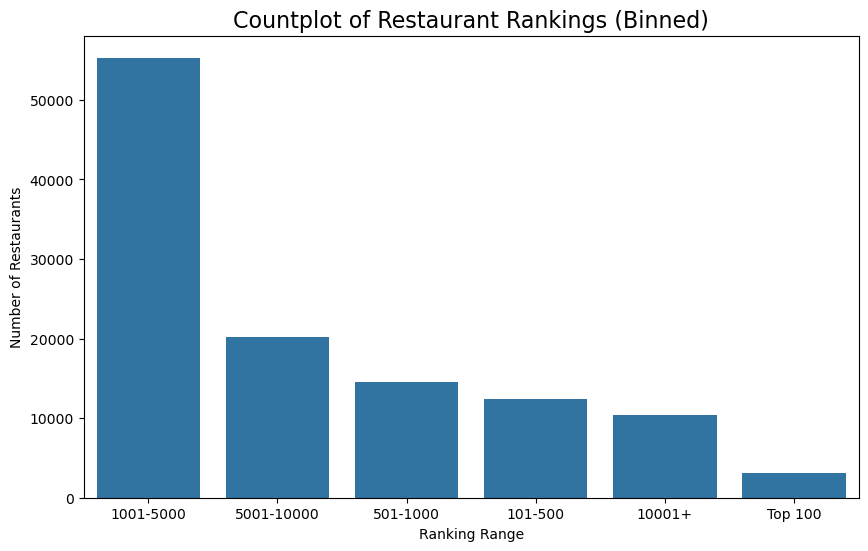

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Ranking_bin', data=df, order=df['Ranking_bin'].value_counts().index)

plt.title("Countplot of Restaurant Rankings (Binned)", fontsize=16)
plt.xlabel("Ranking Range")
plt.ylabel("Number of Restaurants")
plt.show()

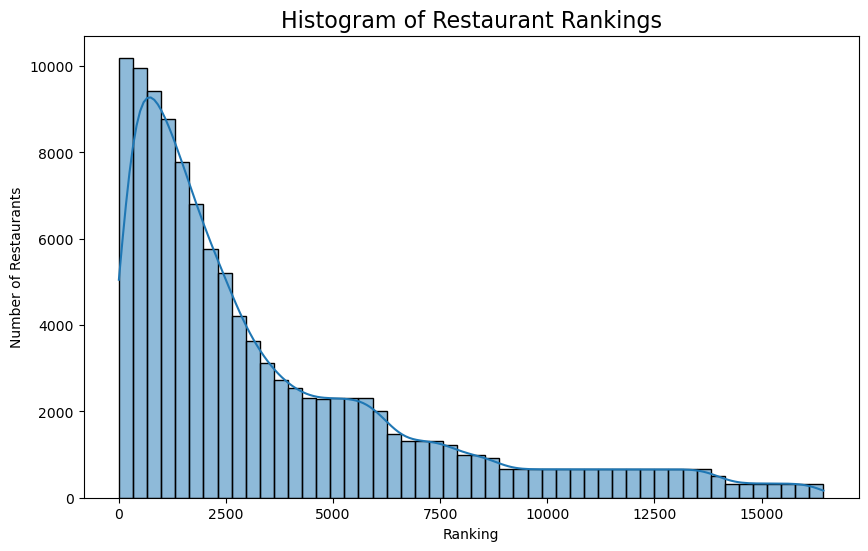

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df['Ranking'], bins=50, kde=True)

plt.title("Histogram of Restaurant Rankings", fontsize=16)
plt.xlabel("Ranking")
plt.ylabel("Number of Restaurants")
plt.show()

In [34]:
df = df.dropna(subset=['Reviews'])

In [35]:
df.head()

Name       City  \
0  Martine of Martine's Table  Amsterdam   
1         De Silveren Spiegel  Amsterdam   
2                     La Rive  Amsterdam   
3                    Vinkeles  Amsterdam   
4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3  ['French', 'European', 'International', 'Conte...      4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   

  Price Range  Number of Reviews  \
0    $$ - $$$              136.0   
1        $$$$              812.0   
2        $$$$              567.0   
3        $$$$              564.0   
4        $$$$              316.0   

                                             Reviews Ranking_bin  
0  [['Just like home', 'A Warm Welcome to Wintry ...     Top 100  
1  [['Great food and staff', 'just perfect'], ['0...     Top 100  
2  [['Satisfaction', 'Delicious old school restau...     Top 100  
3  [['True five star dinner', 'A superb evening o...     Top 100  
4  [['Best meal.... EVER', 'super food experience...     Top 100

In [36]:
df.isnull().sum()

Name                     0
City                     0
Cuisine Style        26851
Ranking                164
Rating                  19
Price Range          40430
Number of Reviews     7729
Reviews                  0
Ranking_bin            164
dtype: int64

In [37]:
df['Reviews'].value_counts()[:10]

Reviews
[[], []]                                                                                    19094
[['Great place'], ['09/03/2016']]                                                               2
[['Delicious'], ['06/17/2017']]                                                                 2
[['A typical italian restaurant pizzeria!'], ['03/28/2017']]                                    2
[['Bad service'], ['02/13/2017']]                                                               2
[['Nice'], ['04/28/2015']]                                                                      2
[['Not bad'], ['01/31/2017']]                                                                   2
[['Perfect service', 'Visited the location in Lavapies.'], ['12/16/2017', '11/30/2017']]        2
[['Arroz & Tiramis√∫!', 'Good restaurant in Madrid'], ['11/11/2017', '04/19/2017']]              2
[['Very good all around', 'Our first Madrid restaurant'], ['11/20/2017', '10/11/2017']]         2
Name: count

In [38]:
def safe_eval(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []   
    return x if isinstance(x, list) else []

In [39]:
df['Clean_Reviews'] = df['Reviews'].apply(safe_eval)

In [40]:
df['Clean_Reviews'][0]

[['Just like home', 'A Warm Welcome to Wintry Amsterdam'],
 ['01/03/2018', '01/01/2018']]

In [41]:
def flatten_and_clean_text(data):
   
    if isinstance(data, list):
        
        flat_list = [item for sublist in data for item in sublist]
        
        full_string = ' '.join(str(item) for item in flat_list)
    else:
      
        full_string = str(data)
    
    date_pattern = r'\b\d{1,4}[-/. ]\d{1,2}[-/. ]\d{2,4}\b'
    year_pattern = r'\b\d{4}\b'
    
   
    clean_text = re.sub(date_pattern, '', full_string)
    clean_text = re.sub(year_pattern, '', clean_text)
    
    # Remove any extra spaces that might have been created
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    
    return clean_text

In [42]:
df['Reviews_cleaned'] = df['Clean_Reviews'].apply(flatten_and_clean_text)

In [43]:
df.head(3)

Name       City  \
0  Martine of Martine's Table  Amsterdam   
1         De Silveren Spiegel  Amsterdam   
2                     La Rive  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   

  Price Range  Number of Reviews  \
0    $$ - $$$              136.0   
1        $$$$              812.0   
2        $$$$              567.0   

                                             Reviews Ranking_bin  \
0  [['Just like home', 'A Warm Welcome to Wintry ...     Top 100   
1  [['Great food and staff', 'just perfect'], ['0...     Top 100   
2  [['Satisfaction', 'Delicious old school restau...     Top 100   

                                       Clean_Reviews  \
0  [[Just like home, A Warm Welcome to Wintry Ams...   
1  [[Great food and staff, just perfect], [01/06/...   
2  [[Satisfaction, Delicious old school restauran...   

                                     Reviews_cleaned  
0  Just like home A Warm Welcome to Wintry Amsterdam  
1                  Great food and staff just perfect  
2       Satisfaction Delicious old school restaurant

In [44]:
df['Reviews_cleaned'][0]

'Just like home A Warm Welcome to Wintry Amsterdam'

In [45]:
df['Cuisine Style'][0]

"['French', 'Dutch', 'European']"

In [47]:
def clean_cuisine(cuisine_str):
    if isinstance(cuisine_str, str):
        try:
            cuisines = ast.literal_eval(cuisine_str) 
            if isinstance(cuisines, list):
                return " ".join(cuisines) 
        except (ValueError, SyntaxError):
            return ""
    return ""

In [48]:
df['Clean_Cuisine'] = df['Cuisine Style'].apply(clean_cuisine)

In [49]:
df['Clean_Cuisine'][0]

'French Dutch European'

In [50]:
df.head(3)

Name       City  \
0  Martine of Martine's Table  Amsterdam   
1         De Silveren Spiegel  Amsterdam   
2                     La Rive  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   

  Price Range  Number of Reviews  \
0    $$ - $$$              136.0   
1        $$$$              812.0   
2        $$$$              567.0   

                                             Reviews Ranking_bin  \
0  [['Just like home', 'A Warm Welcome to Wintry ...     Top 100   
1  [['Great food and staff', 'just perfect'], ['0...     Top 100   
2  [['Satisfaction', 'Delicious old school restau...     Top 100   

                                       Clean_Reviews  \
0  [[Just like home, A Warm Welcome to Wintry Ams...   
1  [[Great food and staff, just perfect], [01/06/...   
2  [[Satisfaction, Delicious old school restauran...   

                                     Reviews_cleaned  \
0  Just like home A Warm Welcome to Wintry Amsterdam   
1                  Great food and staff just perfect   
2       Satisfaction Delicious old school restaurant   

                                       Clean_Cuisine  
0                              French Dutch European  
1  Dutch European Vegetarian Friendly Gluten Free...  
2  Mediterranean French International European Ve...

In [51]:
df.isnull().sum()

Name                     0
City                     0
Cuisine Style        26851
Ranking                164
Rating                  19
Price Range          40430
Number of Reviews     7729
Reviews                  0
Ranking_bin            164
Clean_Reviews            0
Reviews_cleaned          0
Clean_Cuisine            0
dtype: int64

In [52]:
df = df.dropna(subset=['Cuisine Style'])

In [53]:
df.isnull().sum()

Name                     0
City                     0
Cuisine Style            0
Ranking                 92
Rating                  13
Price Range          13579
Number of Reviews     3555
Reviews                  0
Ranking_bin             92
Clean_Reviews            0
Reviews_cleaned          0
Clean_Cuisine            0
dtype: int64

In [54]:
df = df.dropna(subset=['Rating'])

In [55]:
len(df)

89047

In [56]:
city_groups = {
    # Standalone big cities
    "London": "London",
    "Paris": "Paris",
    "Madrid": "Spain",
    "Barcelona": "Spain",
    "Berlin": "Berlin",
    "Milan": "Italy",
    "Rome": "Italy",
    
    # Central Europe
    "Prague": "Central Europe",
    "Vienna": "Central Europe",
    "Budapest": "Central Europe",
    "Warsaw": "Central Europe",
    "Krakow": "Central Europe",
    "Bratislava": "Central Europe",
    
    # Iberian Peninsula (Portugal + smaller Spain)
    "Lisbon": "Portugal/Spain Smaller",
    "Oporto": "Portugal/Spain Smaller",
    
    # Benelux
    "Amsterdam": "Benelux",
    "Brussels": "Benelux",
    "Luxembourg": "Benelux",
    
    # Germany (beyond Berlin standalone)
    "Hamburg": "Germany Smaller",
    "Munich": "Germany Smaller",
    
    # France Smaller
    "Lyon": "France Smaller",
    
    # Nordics
    "Stockholm": "Nordics",
    "Copenhagen": "Nordics",
    "Helsinki": "Nordics",
    "Oslo": "Nordics",
    
    # UK/Ireland
    "Edinburgh": "UK/Ireland",
    "Dublin": "UK/Ireland",
    
    # Switzerland
    "Zurich": "Switzerland",
    "Geneva": "Switzerland",
    
    # Southern Europe
    "Athens": "Southern Europe",
    
    # Balkans
    "Ljubljana": "Balkans",
}


df["City_Group"] = df["City"].map(city_groups)

In [57]:
df['City_Group'].value_counts()

City_Group
London                    13603
Spain                     12041
Central Europe            11076
Paris                     10949
Italy                      9864
Benelux                    5612
Nordics                    4994
Berlin                     4292
Portugal/Spain Smaller     3946
Germany Smaller            3509
UK/Ireland                 3202
Switzerland                2382
France Smaller             1761
Southern Europe            1437
Balkans                     379
Name: count, dtype: int64

In [58]:
df.head()

Name       City  \
0  Martine of Martine's Table  Amsterdam   
1         De Silveren Spiegel  Amsterdam   
2                     La Rive  Amsterdam   
3                    Vinkeles  Amsterdam   
4   Librije's Zusje Amsterdam  Amsterdam   

                                       Cuisine Style  Ranking  Rating  \
0                    ['French', 'Dutch', 'European']      1.0     5.0   
1  ['Dutch', 'European', 'Vegetarian Friendly', '...      2.0     4.5   
2  ['Mediterranean', 'French', 'International', '...      3.0     4.5   
3  ['French', 'European', 'International', 'Conte...      4.0     5.0   
4  ['Dutch', 'European', 'International', 'Vegeta...      5.0     4.5   

  Price Range  Number of Reviews  \
0    $$ - $$$              136.0   
1        $$$$              812.0   
2        $$$$              567.0   
3        $$$$              564.0   
4        $$$$              316.0   

                                             Reviews Ranking_bin  \
0  [['Just like home', 'A Warm Welcome to Wintry ...     Top 100   
1  [['Great food and staff', 'just perfect'], ['0...     Top 100   
2  [['Satisfaction', 'Delicious old school restau...     Top 100   
3  [['True five star dinner', 'A superb evening o...     Top 100   
4  [['Best meal.... EVER', 'super food experience...     Top 100   

                                       Clean_Reviews  \
0  [[Just like home, A Warm Welcome to Wintry Ams...   
1  [[Great food and staff, just perfect], [01/06/...   
2  [[Satisfaction, Delicious old school restauran...   
3  [[True five star dinner, A superb evening of f...   
4  [[Best meal.... EVER, super food experience], ...   

                                     Reviews_cleaned  \
0  Just like home A Warm Welcome to Wintry Amsterdam   
1                  Great food and staff just perfect   
2       Satisfaction Delicious old school restaurant   
3  True five star dinner A superb evening of fine...   
4           Best meal.... EVER super food experience   

                                       Clean_Cuisine City_Group  
0                              French Dutch European    Benelux  
1  Dutch European Vegetarian Friendly Gluten Free...    Benelux  
2  Mediterranean French International European Ve...    Benelux  
3  French European International Contemporary Veg...    Benelux  
4  Dutch European International Vegetarian Friend...    Benelux

In [60]:
restaurant_reviews = df[['Name','City','Ranking','Rating','Price Range','Ranking_bin','Reviews_cleaned','Clean_Cuisine','City_Group']]

In [73]:
df2 = df[['Rating','Reviews_cleaned','Clean_Cuisine']]

In [74]:
df2.isnull().sum()

Rating             0
Reviews_cleaned    0
Clean_Cuisine      0
dtype: int64

In [65]:
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    
    text = re.sub(r'\d+', ' NUM ', text)
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = [word for word in text.split() if word not in stop_words]
    
    return " ".join(tokens)

In [76]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN   

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', 'NUM', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    pos_tags = nltk.pos_tag(tokens)
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return " ".join(tokens)

In [77]:
df2['reviews_preprocessed'] = df2['Reviews_cleaned'].apply(preprocess_text)

In [78]:
df2.head()

Rating                                    Reviews_cleaned  \
0     5.0  Just like home A Warm Welcome to Wintry Amsterdam   
1     4.5                  Great food and staff just perfect   
2     4.5       Satisfaction Delicious old school restaurant   
3     5.0  True five star dinner A superb evening of fine...   
4     4.5           Best meal.... EVER super food experience   

                                       Clean_Cuisine  \
0                              French Dutch European   
1  Dutch European Vegetarian Friendly Gluten Free...   
2  Mediterranean French International European Ve...   
3  French European International Contemporary Veg...   
4  Dutch European International Vegetarian Friend...   

                                reviews_preprocessed  
0            like home warm welcome wintry amsterdam  
1                           great food staff perfect  
2       satisfaction delicious old school restaurant  
3  true five star dinner superb even fine dining ...  
4               best meal ever super food experience

In [80]:
len(df2)

89047

In [82]:
df2.to_csv("df_Cleaned.csv",index=False)

In [83]:
check_df = pd.read_csv("df_Cleaned.csv")

In [84]:
check_df.isnull().sum()

Rating                     0
Reviews_cleaned         9675
Clean_Cuisine              0
reviews_preprocessed    9685
dtype: int64

In [87]:
len(check_df)

89047

In [88]:
df2.to_pickle("df_cleaned_2.pkl")

In [67]:
restaurant_reviews.to_pickle("restaurant_reviews.pkl")